In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def stationary(mean=10, scale=10, size=100):
    '''
    mean:  center of a distribution
    scale: width of the distribution
    '''
    stat = np.random.normal(mean, scale, size)
    stat = np.rint(stat)
    return stat

In [3]:
def trendy(k=3, b=3, size=100):
    func = lambda x, k, b: (k*x + b)
    linear = np.array([func(x, k, b) for x in range(1,size+1)])
    return linear
    

In [4]:
def const(b=3, size=100):
    return trendy(0, b, size)

In [5]:
def noice(noice_per=5, amplitude=10, size=100):
    import time
    np.random.seed(int(time.time()))
    noice_per /=100
    noice_high = amplitude
    noice_low = -1 * amplitude
    randoms = np.random.randint(low=noice_low, high=noice_high, size=(int(size * noice_per)))
    noice = np.array([0]*int(size * round(1-noice_per,2)))
    noice = np.concatenate((noice, randoms))
    np.random.shuffle(noice)
    return noice

In [6]:
def near_linear(k=3, b=3, noice_per=5, amplitude=3, size=100):
    linear = trendy(k, b, size)
    nc = noice(noice_per=noice_per, size=size, amplitude=amplitude)
    near_linear = linear + nc
    return near_linear
    

In [7]:
def near_constant(const=5, amplitude=5, noice_per=5, size=100):
    return near_linear(k=0, b=const, amplitude=amplitude, size=size)
    

In [8]:
def trend_stationary(k=3, b=3, mean=10, scale=10, size=100):
    linear = trendy(k=k, b=b, size=size)
    stat = stationary(mean=mean, scale=scale, size=size)
    return linear + stat

    

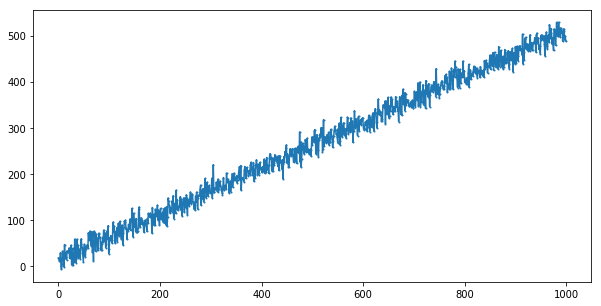

In [16]:
d = {}
d['k'] = 0.5
d['b'] = 3
d['mean'] = 10
d['scale']=15
d['size']=1000
t_stat = trend_stationary(**d)

plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(t_stat,marker='o', markersize=1)
plt.show()